In [1]:
import numpy as np

class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999, eps=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps

        self.m = None   # 1次モーメント
        self.v = None   # 2次モーメント
        self.t = 0      # 時刻ステップ

    def update(self, params, grads):
        """
        params: パラメータ（numpy array）
        grads: 勾配（numpy array）
        """
        if self.m is None:
            self.m = np.zeros_like(params)
        if self.v is None:
            self.v = np.zeros_like(params)

        self.t += 1

        # --- モーメント更新 ---
        self.m = self.beta1 * self.m + (1 - self.beta1) * grads
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grads ** 2)

        # --- バイアス補正 ---
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)

        # --- パラメータ更新 ---
        params -= self.lr * m_hat / (np.sqrt(v_hat) + self.eps)

        return params


In [2]:
# 目的関数 f(x) = x^2
f = lambda x: x**2
grad_f = lambda x: 2*x

adam = Adam(lr=0.1)

x = np.array(5.0)  # 初期値
history = []

for i in range(50):
    grad = grad_f(x)
    x = adam.update(x, grad)
    history.append(f(x))

print("最終的な x:", x)
print("最終的な f(x):", f(x))

最終的な x: 0.9011191043660974
最終的な f(x): 0.8120156402535575


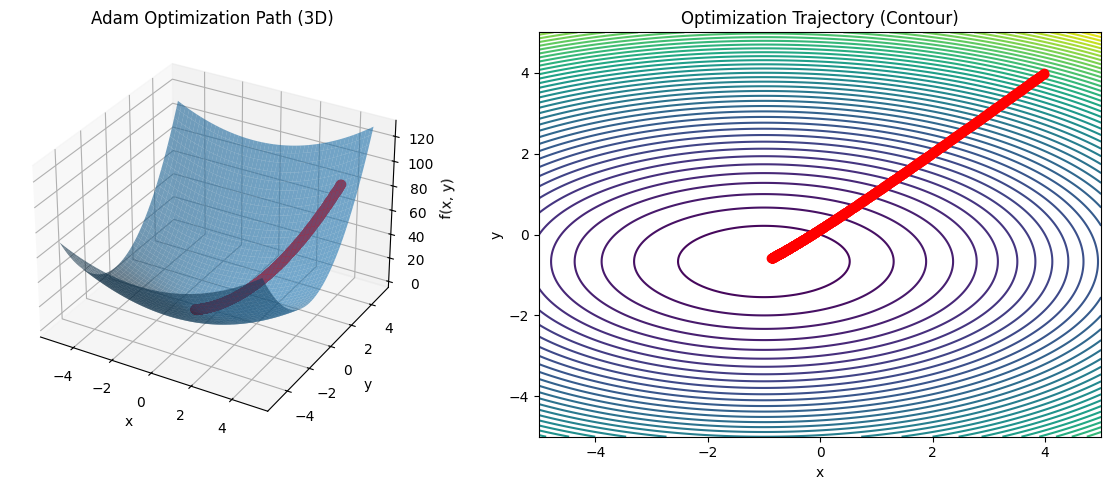

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------
# Adam オプティマイザ（あなたのコード）
# -------------------------------
class Adam:
    def __init__(self, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps

        self.m = None
        self.v = None
        self.t = 0

    def update(self, params, grads):
        if self.m is None:
            self.m = np.zeros_like(params)
        if self.v is None:
            self.v = np.zeros_like(params)

        self.t += 1

        # モーメント
        self.m = self.beta1 * self.m + (1 - self.beta1) * grads
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grads ** 2)

        # バイアス補正
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)

        params -= self.lr * m_hat / (np.sqrt(v_hat) + self.eps)
        return params

# -------------------------------
# 最適化したい関数（例：二次関数）
# -------------------------------
def f(x, y):
    return x**2 + 3*y**2 + 2*x + 4*y

# 勾配
def grad_f(x, y):
    df_dx = 2*x + 2
    df_dy = 6*y + 4
    return np.array([df_dx, df_dy])


# -------------------------------
# 最適化ループ
# -------------------------------
adam = Adam(lr=0.01)
params = np.array([4.0, 4.0])  # 初期値

trajectory = []  # 軌跡保存

for _ in range(1000):
    grads = grad_f(params[0], params[1])
    params = adam.update(params, grads)
    trajectory.append(params.copy())

trajectory = np.array(trajectory)

# -------------------------------
# ３Ｄ可視化
# -------------------------------
fig = plt.figure(figsize=(12, 5))

# ======= 3D Surface Plot ======
ax = fig.add_subplot(1, 2, 1, projection='3d')

X = np.linspace(-5, 5, 200)
Y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

ax.plot_surface(X, Y, Z, alpha=0.6)

# 軌跡を上から描画
Z_traj = f(trajectory[:, 0], trajectory[:, 1])
ax.plot(trajectory[:, 0], trajectory[:, 1], Z_traj, color='red', linewidth=2, marker='o')

ax.set_title("Adam Optimization Path (3D)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")


# ======= Contour Plot ======
ax2 = fig.add_subplot(1, 2, 2)

contour = ax2.contour(X, Y, Z, levels=50)
ax2.plot(trajectory[:, 0], trajectory[:, 1], color='red', marker='o')
ax2.set_title("Optimization Trajectory (Contour)")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

plt.tight_layout()
plt.show()
